In [ ]:
# Import all needed functions and modules
from main import run_temperature_sweep
import instruments

In [2]:
# Initialise the lockin and hotstage.
# Check the address for the lockin and hotstage. 
# If needed run the next code block to find out the ID's

lockin = instruments.SRLockinAmplifier("GPIB0::1::INSTR") # initialise the lockin
lockin.initialise_dualharmonic() # initialise dual harmonic mode

hotstage = instruments.LinkamHotstage("ASRL6::INSTR") # inistialise hotstage
print(hotstage.current_temperature()[0])

Lockin connected
Linkam Connected
35.2


In [8]:
hotstage = instruments.LinkamHotstage("ASRL6::INSTR") # inistialise hotstage
print(hotstage.current_temperature()[0])

Linkam Connected
28.7


In [ ]:
import pyvisa
rm = pyvisa.ResourceManager()
visa_resources = rm.list_resources("?*")
print(visa_resources)

In [9]:
# Set run parameters in deg C

file_name = "5CB.csv"
wavelength = 635e-9
cellgap = 1.5e-6
rate = 1 # 0.1 <= rate <= 30
start_temp = 36 # 25 <= start <= 300
end_temp = 25 # 25 <= stop <= 300
step = 0.2 # 0.1 <= step <= 20

Input params valid
Going to start temperature at 36 C
Current temperature: 28.50 °C
Current temperature: 28.60 °C
Current temperature: 29.40 °C
Current temperature: 30.40 °C
Current temperature: 31.40 °C
Current temperature: 32.40 °C
Current temperature: 33.30 °C
Current temperature: 34.20 °C
Current temperature: 35.00 °C
Current temperature: 35.80 °C
Current temperature: 36.20 °C
Current temperature: 36.40 °C
Current temperature: 36.40 °C
Current temperature: 36.40 °C
Current temperature: 36.30 °C
Current temperature: 36.30 °C
Current temperature: 36.20 °C
Current temperature: 36.10 °C
At 36 C waiting for initial stabilisation
Running 36.0 C process
Waiting for stabilisation at 36.0 C
Current temperature: 36.00 °C
Temperature stabilised at 36.0 C
Careful! One value out of range
[09:51:25] Measurement at 36.0 C done


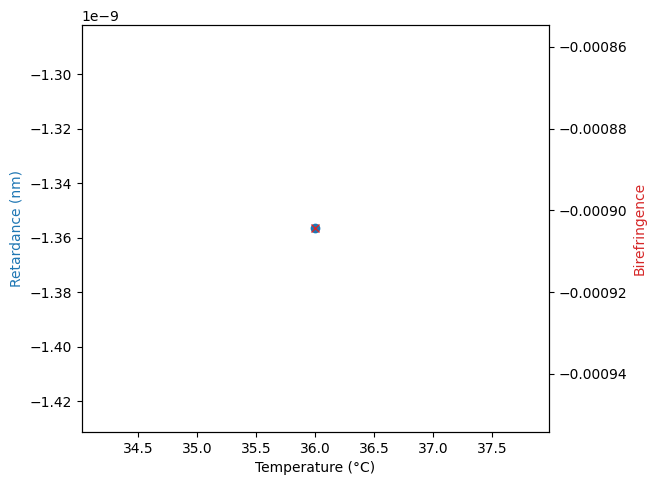

Running 35.8 C process
Waiting for stabilisation at 35.8 C
Current temperature: 35.90 °C
Temperature stabilised at 35.8 C
Careful! One value out of range
[09:51:46] Measurement at 35.8 C done
Running 35.6 C process
Waiting for stabilisation at 35.6 C
Current temperature: 35.70 °C
Temperature stabilised at 35.6 C
Careful! One value out of range
[09:52:07] Measurement at 35.6 C done
Running 35.4 C process
Waiting for stabilisation at 35.4 C
Current temperature: 35.50 °C
Temperature stabilised at 35.4 C
Careful! One value out of range
[09:52:29] Measurement at 35.4 C done
Running 35.2 C process
Waiting for stabilisation at 35.2 C
Current temperature: 35.30 °C
Temperature stabilised at 35.2 C
Careful! One value out of range
[09:52:50] Measurement at 35.2 C done
Running 35.0 C process
Waiting for stabilisation at 35.0 C
Current temperature: 35.10 °C
Temperature stabilised at 35.0 C
Careful! One value out of range
[09:53:11] Measurement at 35.0 C done
Running 34.8 C process
Waiting for stabi

In [ ]:
# Collect raw v1f and v2f data for the settings above


run_temperature_sweep(start_temp, end_temp, step, rate, wavelength, cellgap, file_name, hotstage, lockin)